In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
tf.random.set_seed(3)

In [2]:
import cv2
from PIL import Image

In [3]:
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading MNIST Dataset

In [4]:
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

In [5]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

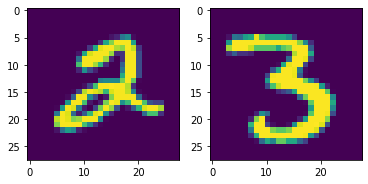

In [6]:
plt.subplot(1,2,1)
img = Image.fromarray(X_train[5])
plt.imshow(img)
plt.subplot(1,2,2)
img = Image.fromarray(X_train[12])
plt.imshow(img)

Setting up the Layers of NN

In [7]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(40,activation='relu'),
    keras.layers.Dense(60,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
                        ])

In [8]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
            )

In [9]:
history = model.fit(X_train,Y_train,validation_split=0.25,epochs=50)

Epoch 1/50
1407/1407 [==============================] - 12s 7ms/step - loss: 1.7159 - accuracy: 0.7338 - val_loss: 0.5339 - val_accuracy: 0.8640
Epoch 2/50
1407/1407 [==============================] - 9s 6ms/step - loss: 0.4814 - accuracy: 0.8807 - val_loss: 0.4658 - val_accuracy: 0.8879
Epoch 3/50
1407/1407 [==============================] - 9s 6ms/step - loss: 0.3967 - accuracy: 0.9014 - val_loss: 0.3984 - val_accuracy: 0.9040
Epoch 4/50
1407/1407 [==============================] - 9s 6ms/step - loss: 0.3443 - accuracy: 0.9152 - val_loss: 0.3341 - val_accuracy: 0.9183
Epoch 5/50
1407/1407 [==============================] - 9s 6ms/step - loss: 0.3264 - accuracy: 0.9192 - val_loss: 0.3773 - val_accuracy: 0.9093
Epoch 6/50
1407/1407 [==============================] - 8s 6ms/step - loss: 0.3013 - accuracy: 0.9245 - val_loss: 0.3035 - val_accuracy: 0.9230
Epoch 7/50
1407/1407 [==============================] - 8s 6ms/step - loss: 0.2743 - accuracy: 0.9303 - val_loss: 0.3326 - val_accuracy

In [10]:
loss,metrics = model.evaluate(X_test,Y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.2754 - accuracy: 0.9559


1 9


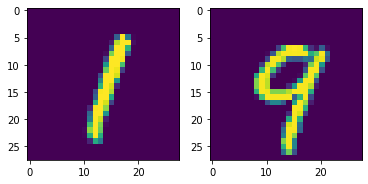

In [11]:
plt.subplot(1,2,1)
img = Image.fromarray(X_test[5])
plt.imshow(img)
plt.subplot(1,2,2)
img = Image.fromarray(X_test[12])
plt.imshow(img)
print(Y_test[5],Y_test[12])

In [12]:
test_pred = model.predict(X_test)

In [13]:
Y_arg_max_list = [np.argmax(i) for i in test_pred]

In [14]:
Y_arg_max_list[0:10]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

In [15]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(Y_test,Y_arg_max_list)
print(cnf_matrix)

[[ 964    0    1    2    0    3    3    3    3    1]
 [   0 1109    3    3    2    2    3    0   12    1]
 [   7    6  973   16    3    0    2   11   10    4]
 [   2    1   11  970    1    5    0    7   11    2]
 [   2    1    7    3  913    0    3    3    8   42]
 [   4    0    1   25    0  837    9    2    9    5]
 [   8    3    5    1    5    9  919    0    8    0]
 [   0    7   12    6    1    0    0  994    1    7]
 [   7    2    8   11    2    5    3    6  920   10]
 [   3    2    1    9    9    2    1    9   13  960]]


Text(0.5, 69.0, 'Predicted Labels')

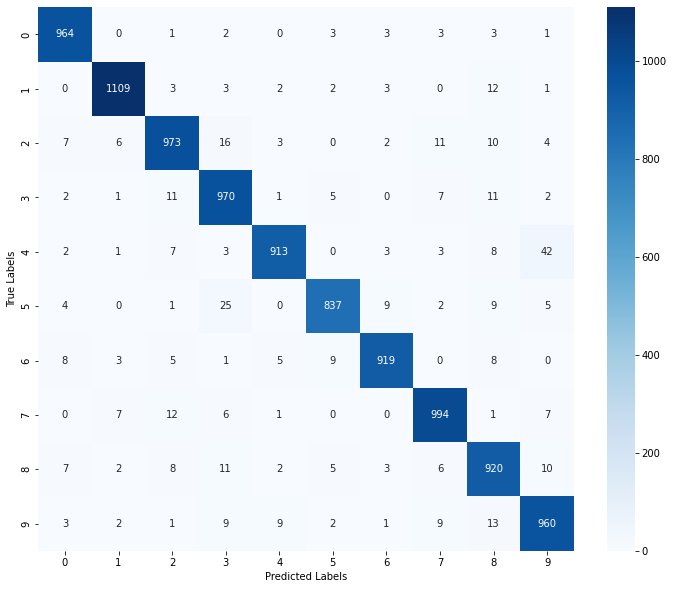

In [16]:
plt.figure(figsize=(12,10))
sns.heatmap(cnf_matrix,annot=True,cmap ='Blues',fmt='d')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

3

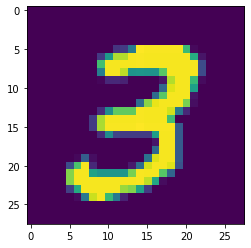

In [17]:
test_img = cv2.imread(r'MNIST_digit.png')
test_img = cv2.cvtColor(test_img,cv2.COLOR_RGB2GRAY)
test_img = cv2.resize(test_img,(28,28))
plt.imshow(test_img)
scaled_img = test_img/255
img_reshape = np.reshape(scaled_img,[1,28,28])
input_pred = model.predict(img_reshape)
np.argmax(input_pred)